# Project Aim

Spiral Drawing Behavior Analysis is a method in medical to diagnose
whether a patient have a symptom for Parkinsons disease from their
tendency in drawing a spiral on a piece of paper. This diagnostic
method then further implemented using Neural Network from images
data that collected from over 3,264 patient drawings. The goal for this
project is to detects patient condition to mimics the Spiral Drawing
Behavior Analysis using Deep Learning Model (CNN VGG19)

## **Sample Drawings of Healthy Patient**
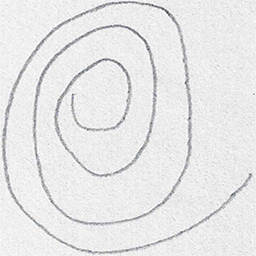

## **Sample Drawings of Patient with Parkinson Disease**
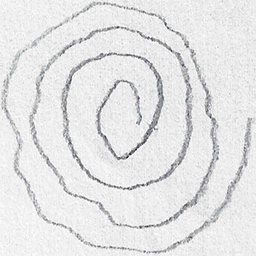

## Importing Libraries

### Importing Library for Array Function

In [ ]:
import numpy as np

### Importing Library for Deeplearning

In [ ]:
!pip install tensorflow

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Input

### Importing Library for The Utilities

In [ ]:
import os
import zipfile
import random
import shutil
from shutil import copyfile
import zipfile

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Importing Library for Visualization

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
%matplotlib inline

## Image Dataset Preparations

### Importing Image Dataset

In [ ]:
source_path = '/content/drive/MyDrive/Datasetdsp'

source_path_healty = os.path.join(source_path, 'Healthy')
source_path_parkinson = os.path.join(source_path, 'Parkinson')


print(f"There are {len(os.listdir(source_path_healty))} images of Healty.")
print(f"There are {len(os.listdir(source_path_parkinson))} images of Parkinson.")


_1_files = os.listdir(source_path_healty)
print(_1_files[:10])

_2_files = os.listdir(source_path_parkinson)
print(_2_files[:10])


There are 1632 images of Healty.
There are 1632 images of Parkinson.
['Healthy967.png', 'Healthy502.png', 'Healthy340.png', 'Healthy424.png', 'Healthy887.png', 'Healthy754.png', 'Healthy748.png', 'Healthy684.png', 'Healthy228.png', 'Healthy689.png']
['Parkinson292.png', 'Parkinson563.png', 'Parkinson979.png', 'Parkinson645.png', 'Parkinson866.png', 'Parkinson950.png', 'Parkinson226.png', 'Parkinson714.png', 'Parkinson486.png', 'Parkinson462.png']


### Creating Directory before Image Data Splitting

In [ ]:
root_dir = '/content/drive/MyDrive/Datasetdsp/New'

if os.path.exists(root_dir):
  shutil.rmtree(root_dir)

def create_train_val_dirs(root_path):

  make_train_dir=os.path.join(root_dir,'training')
  make_validation_dir=os.path.join(root_dir,'validation')

  os.makedirs(make_train_dir)
  os.makedirs(make_validation_dir)

  train_1_dir=os.path.join(make_train_dir,'Healthy')
  train_2_dir=os.path.join(make_train_dir,'Parkinson')

  validation_1_dir=os.path.join(make_validation_dir,'Healthy')
  validation_2_dir=os.path.join(make_validation_dir,'Parkinson')


  os.makedirs(train_1_dir)
  os.makedirs(validation_1_dir)
  os.makedirs(train_2_dir)
  os.makedirs(validation_2_dir)

try:
  create_train_val_dirs(root_path=root_dir)
except FileExistsError:
  print("You should not be seeing this since the upper directory is removed beforehand")

### Show the directory

In [ ]:
for rootdir, dirs, files in os.walk(root_dir):
    for subdir in dirs:
        print(os.path.join(rootdir, subdir))

/content/drive/MyDrive/Datasetdsp/New/training
/content/drive/MyDrive/Datasetdsp/New/validation
/content/drive/MyDrive/Datasetdsp/New/training/Healthy
/content/drive/MyDrive/Datasetdsp/New/training/Parkinson
/content/drive/MyDrive/Datasetdsp/New/validation/Healthy
/content/drive/MyDrive/Datasetdsp/New/validation/Parkinson


### Make function for Splitting Dataset into Train and Validation Sets

In [ ]:
def split_data(SOURCE_DIR, TRAINING_DIR, VALIDATION_DIR, SPLIT_SIZE):
  list_files=os.listdir(SOURCE_DIR)

  list_files=[
      list_file for list_file in list_files if os.path.getsize(os.path.join(SOURCE_DIR, list_file))>0
  ]

  split_size=int(len(list_files)*SPLIT_SIZE)

  training_file=list_files[:split_size]
  validation_file=list_files[split_size:]

  for file in training_file:
    source_file=os.path.join(SOURCE_DIR, file)
    destination_file=os.path.join(TRAINING_DIR, file)
    copyfile(source_file,destination_file)

  for file in validation_file:
    source_file=os.path.join(SOURCE_DIR, file)
    destination_file=os.path.join(VALIDATION_DIR, file)
    copyfile(source_file,destination_file)

### Copy data into the directory

In [ ]:
_1_SOURCE_DIR = "/content/drive/MyDrive/Datasetdsp/Healthy"
_2_SOURCE_DIR = "/content/drive/MyDrive/Datasetdsp/Parkinson"

TRAINING_DIR = "/content/drive/MyDrive/Datasetdsp/New/training"
VALIDATION_DIR = "/content/drive/MyDrive/Datasetdsp/New/validation"

TRAINING_1_DIR = os.path.join(TRAINING_DIR, "Healthy/")
VALIDATION_1_DIR = os.path.join(VALIDATION_DIR, "Healthy/")

TRAINING_2_DIR = os.path.join(TRAINING_DIR, "Parkinson/")
VALIDATION_2_DIR = os.path.join(VALIDATION_DIR, "Parkinson/")


if len(os.listdir(TRAINING_1_DIR)) > 0:
  for file in os.scandir(TRAINING_1_DIR):
    os.remove(file.path)
if len(os.listdir(TRAINING_2_DIR)) > 0:
  for file in os.scandir(TRAINING_2_DIR):
    os.remove(file.path)


split_size = .9

split_data(_1_SOURCE_DIR, TRAINING_1_DIR, VALIDATION_1_DIR, split_size)
split_data(_2_SOURCE_DIR, TRAINING_2_DIR, VALIDATION_2_DIR, split_size)



print(f"\n\nHealthy has {len(os.listdir(_1_SOURCE_DIR))} images\n")
print(f"Parkinson has {len(os.listdir(_2_SOURCE_DIR))} images\n")


print(f"There are {len(os.listdir(TRAINING_1_DIR))} images of Healthy for training")
print(f"There are {len(os.listdir(TRAINING_2_DIR))} images of Parkinson for training")


print(f"There are {len(os.listdir(VALIDATION_1_DIR))} images of Healthy for validation")
print(f"There are {len(os.listdir(VALIDATION_2_DIR))} images of Parkinson for validation ")



Healthy has 1632 images

Parkinson has 1632 images

There are 1468 images of Healthy
There are 1468 images of Parkinson for training
There are 164 images of Healthy
There are 164 images of Parkinson Cream for validation


## Image Preprocessing

### Training and Validation Data Initialization

In [ ]:
TRAINING_DIR = "/content/drive/MyDrive/Datasetdsp/New/training"
VALIDATION_DIR = "/content/drive/MyDrive/Datasetdsp/New/validation"

### Image Augmentation

In [ ]:
def train_val_generators(TRAINING_DIR, VALIDATION_DIR):
    train_datagen = ImageDataGenerator(rescale=1./255,
                                       rotation_range=40,
                                       width_shift_range=0.2,
                                       height_shift_range=0.2,
                                       shear_range=0.2,
                                       zoom_range=0.2,
                                       horizontal_flip=True,
                                       fill_mode='nearest')

    train_generator = train_datagen.flow_from_directory(TRAINING_DIR,
                                                        batch_size=64,
                                                        class_mode='categorical',
                                                        target_size=(350, 350),
                                                        classes=['Healthy', 'Parkinson'])

    validation_datagen = ImageDataGenerator(rescale=1.0/255.)

    validation_generator = validation_datagen.flow_from_directory(VALIDATION_DIR,
                                                                  batch_size=32,
                                                                  class_mode='categorical',
                                                                  target_size=(350, 350),
                                                                  classes=['Healthy', 'Parkinson'])

    return train_generator, validation_generator


nanti tak rapiin

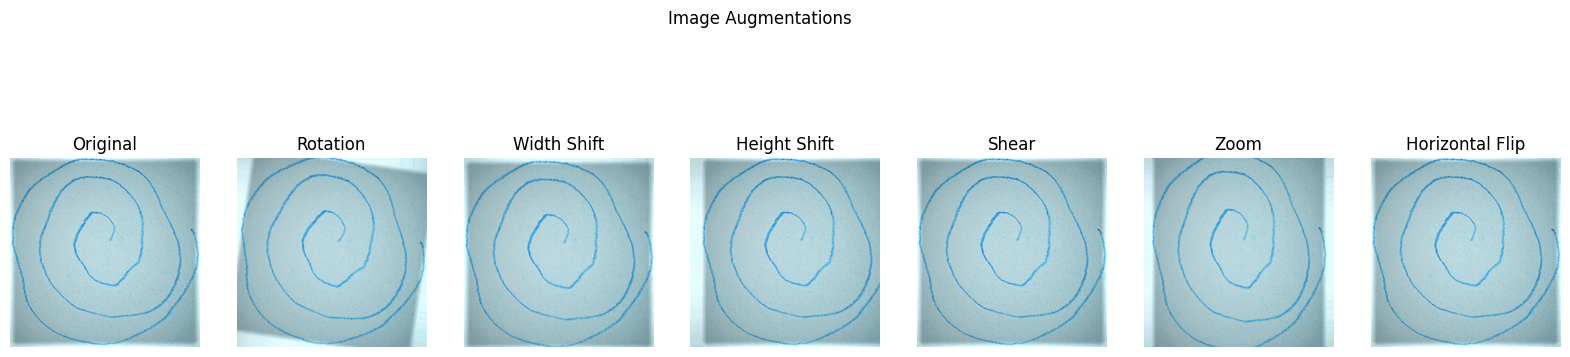

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

def show_augmented_images(image_path):
    img = load_img(image_path)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)
    augmentations = {
        "Original": ImageDataGenerator(rescale=1./255),
        "Rotation": ImageDataGenerator(rotation_range=40, rescale=1./255),
        "Width Shift": ImageDataGenerator(width_shift_range=0.08, rescale=1./255),
        "Height Shift": ImageDataGenerator(height_shift_range=0.08, rescale=1./255),
        "Shear": ImageDataGenerator(shear_range=0.08, rescale=1./255),
        "Zoom": ImageDataGenerator(zoom_range=0.08, rescale=1./255),
        "Horizontal Flip": ImageDataGenerator(horizontal_flip=False, rescale=1./255)
    }

    fig, axes = plt.subplots(1, len(augmentations), figsize=(20, 5))
    fig.suptitle('Image Augmentations')

    for ax, (name, datagen) in zip(axes, augmentations.items()):
        # Apply the augmentation
        for batch in datagen.flow(x, batch_size=1):
            augmented_image = batch[0]
            break

        # Convert the scaled image back to 0-255 range for display
        augmented_image = augmented_image * 255.0

        ax.imshow(augmented_image.astype(np.uint8))
        ax.set_title(name)
        ax.axis('off')

    plt.show()

# Path to a sample image
image_path = 'Healthy139.png'
show_augmented_images(image_path)


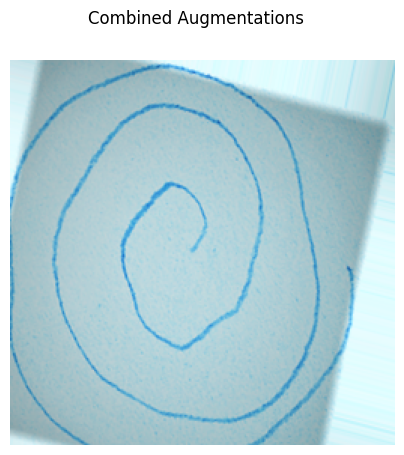

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array

def show_combined_augmented_image(image_path):
    img = load_img(image_path)
    x = img_to_array(img)
    x = np.expand_dims(x, axis=0)

    # Define the ImageDataGenerator with all augmentations
    datagen = ImageDataGenerator(
        rescale=1./255,
        rotation_range=40,
        width_shift_range=0.08,
        height_shift_range=0.08,
        shear_range=0.08,
        zoom_range=0.08,
        horizontal_flip=False,
        fill_mode='nearest'
    )

    fig, ax = plt.subplots(1, 1, figsize=(5, 5))
    fig.suptitle('Combined Augmentations')

    # Apply the augmentation
    for batch in datagen.flow(x, batch_size=1):
        combined_augmented_image = batch[0]
        break

    # Convert the scaled image back to 0-255 range for display
    combined_augmented_image = combined_augmented_image * 255.0

    ax.imshow(combined_augmented_image.astype(np.uint8))
    ax.axis('off')

    plt.show()

# Path to a sample image
image_path = 'Healthy139.png'
show_combined_augmented_image(image_path)


## Image Feature Vizualization

### Detect the contour

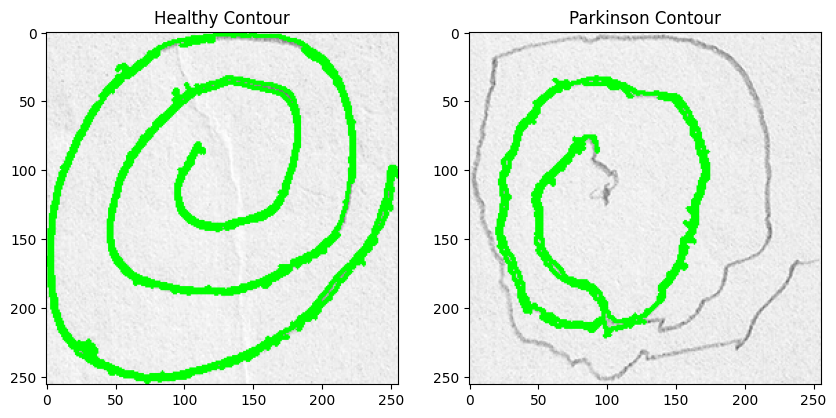

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Fungsi untuk mendeteksi dan menggambar kontur
def detect_and_draw_contour(image_path):
    # Membaca gambar dan mengubahnya menjadi citra skala abu-abu
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Deteksi tepi menggunakan Canny edge detector
    edges = cv2.Canny(image, 50, 150)

    # Menemukan kontur dalam gambar
    contours, _ = cv2.findContours(edges, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)

    # Memilih kontur terbesar berdasarkan luasnya
    contour = max(contours, key=cv2.contourArea)

    # Menggambar kontur pada citra
    image_contour = cv2.cvtColor(image, cv2.COLOR_GRAY2BGR)
    cv2.drawContours(image_contour, [contour], -1, (0, 255, 0), 2)

    return image_contour

# Path gambar untuk gambar sehat dan gambar parkinson
healthy_image_path = '/content/drive/MyDrive/Datasetdsp/New/training/Healthy/Healthy13.jpg'
parkinson_image_path = '/content/drive/MyDrive/Datasetdsp/New/training/Parkinson/Parkinson13.jpg'

# Mendeteksi dan menggambar kontur untuk kedua gambar
healthy_contour = detect_and_draw_contour(healthy_image_path)
parkinson_contour = detect_and_draw_contour(parkinson_image_path)

# Menampilkan kedua hasil deteksi kontur dalam satu gambar
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(cv2.cvtColor(healthy_contour, cv2.COLOR_BGR2RGB))
plt.title('Healthy Contour')
plt.subplot(1, 2, 2)
plt.imshow(cv2.cvtColor(parkinson_contour, cv2.COLOR_BGR2RGB))
plt.title('Parkinson Contour')
plt.show()


### Radius of Curvature along the Spiral

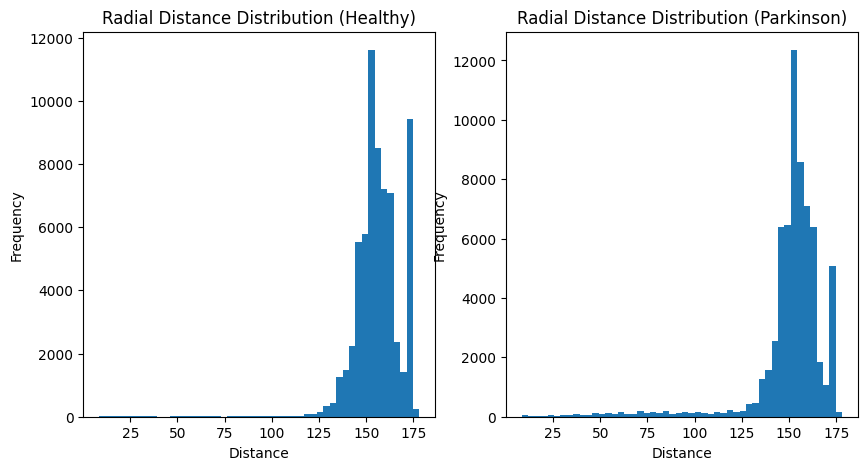

In [ ]:

# Menghitung distribusi jarak radial untuk kedua gambar
distances_healthy = np.sqrt((healthy_contour[:, :, 0] - center[0])**2 + (healthy_contour[:, :, 1] - center[1])**2)
distances_parkinson = np.sqrt((parkinson_contour[:, :, 0] - center[0])**2 + (parkinson_contour[:, :, 1] - center[1])**2)

# Memplot histogram distribusi jarak radial untuk kedua gambar
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.hist(distances_healthy.flatten(), bins=50)
plt.title('Radial Distance Distribution (Healthy)')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.subplot(1, 2, 2)
plt.hist(distances_parkinson.flatten(), bins=50)
plt.title('Radial Distance Distribution (Parkinson)')
plt.xlabel('Distance')
plt.ylabel('Frequency')
plt.show()

### Wavelet untuk melihat tepi

Wavelet Transform for Healthy Image


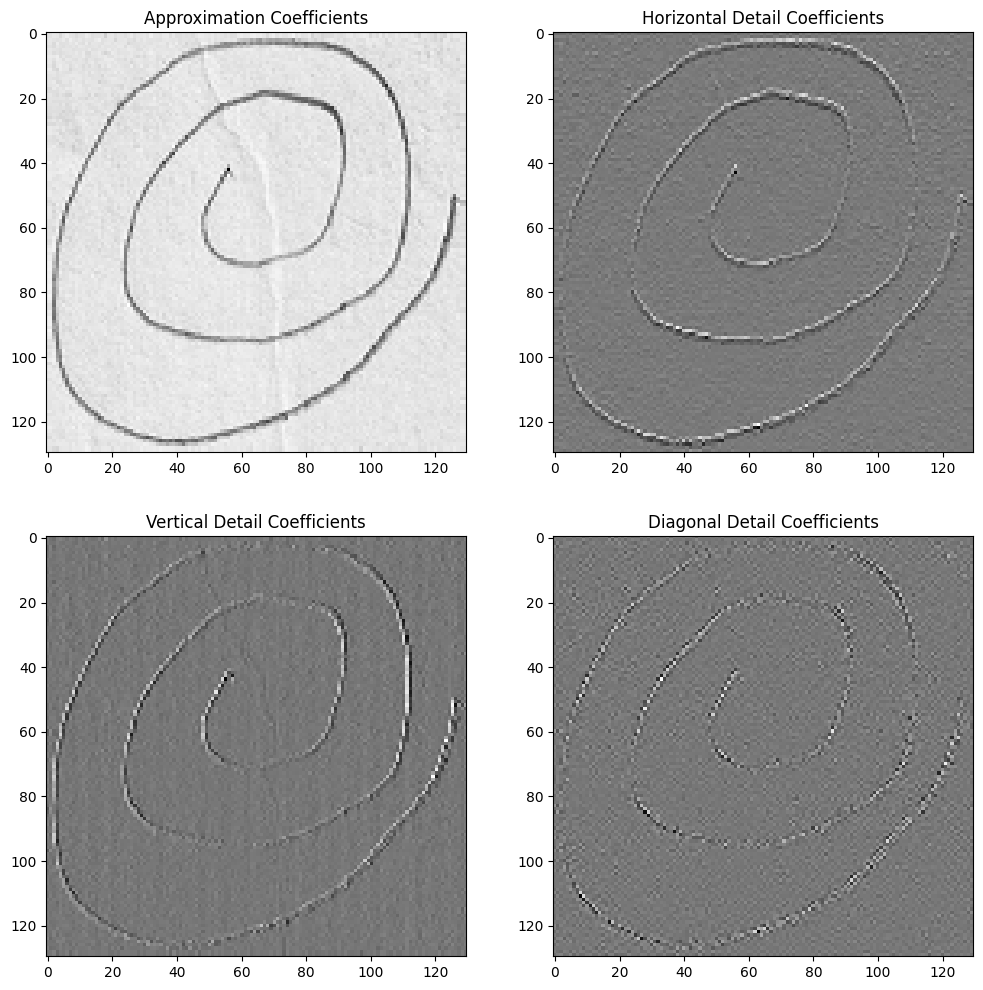

Wavelet Transform for Parkinson Image


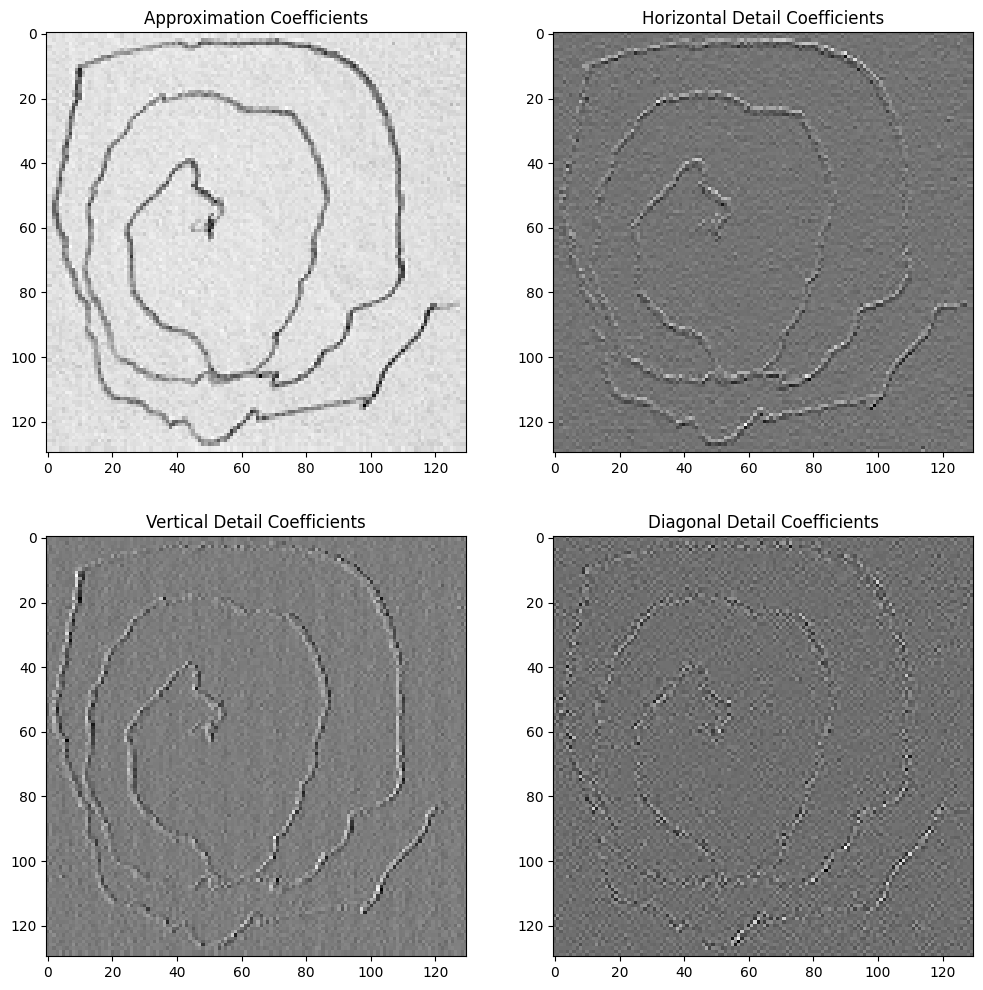

In [ ]:
import pywt

# Fungsi untuk melakukan wavelet transform dan menampilkan hasilnya
def wavelet_transform(image_path):
    # Membaca gambar dan mengubahnya menjadi citra skala abu-abu
    image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)

    # Melakukan wavelet transform pada gambar
    coeffs2 = pywt.dwt2(image, 'bior1.3')
    LL, (LH, HL, HH) = coeffs2

    plt.figure(figsize=(12, 12))

    plt.subplot(221), plt.imshow(LL, cmap='gray')
    plt.title('Approximation Coefficients')
    plt.subplot(222), plt.imshow(LH, cmap='gray')
    plt.title('Horizontal Detail Coefficients')
    plt.subplot(223), plt.imshow(HL, cmap='gray')
    plt.title('Vertical Detail Coefficients')
    plt.subplot(224), plt.imshow(HH, cmap='gray')
    plt.title('Diagonal Detail Coefficients')

    plt.show()


# Melakukan wavelet transform untuk gambar sehat
print("Wavelet Transform for Healthy Image")
wavelet_transform(healthy_image_path)

# Melakukan wavelet transform untuk gambar yang mengalami Parkinson
print("Wavelet Transform for Parkinson Image")
wavelet_transform(parkinson_image_path)


## Model Architecture

### Base Model Installation

In [ ]:
base_model=tf.keras.applications.VGG19(include_top=False, weights="imagenet",input_tensor=Input(shape=(350,350,3)))
# base_model = tf.keras.applications.Xception(include_top=False, weights="imagenet", input_tensor=Input(shape=(350, 350, 3)))


80134624/80134624 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 350, 350, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 350, 350, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 350, 350, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 175, 175, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 175, 175, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 175, 175, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 87, 87, 128)       0     

In [ ]:
base_model.trainable = False

### Initializing Training and Validation Generators

In [ ]:
train_generator, validation_generator = train_val_generators(TRAINING_DIR, VALIDATION_DIR)

Found 2936 images belonging to 2 classes.
Found 328 images belonging to 2 classes.


### Constructing  CNN Model Architecture with Transfer Learning

In [ ]:
model = tf.keras.Sequential([
    base_model,
    tf.keras.layers.Conv2D(filters=64, padding='same', kernel_size=3, activation='relu', strides=1),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Conv2D(filters=64, padding='same', kernel_size=3, activation='relu', strides=1),
    tf.keras.layers.MaxPool2D(pool_size=2, strides=2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.5),  # Tingkat dropout yang lebih tinggi
    tf.keras.layers.Dense(128, activation='relu'),  # Lapisan Dense tambahan
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(2, activation='softmax')
])

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 vgg19 (Functional)          (None, 10, 10, 512)       20024384  
                                                                 
 conv2d (Conv2D)             (None, 10, 10, 64)        294976    
                                                                 
 max_pooling2d (MaxPooling2  (None, 5, 5, 64)          0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 5, 5, 64)          36928     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 2, 2, 64)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0

### Model Compilation

In [ ]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

## Model Training

In [ ]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if logs.get('accuracy') > 0.95 and logs.get('val_accuracy') > 0.95 :
      self.model.stop_training = True

callbacks=myCallback()

total_sample = train_generator.n
n_batch = 64

history = model.fit(train_generator, epochs=85, validation_data=validation_generator, steps_per_epoch = int(total_sample/n_batch), callbacks=[callbacks])

Epoch 1/85
45/45 [==============================] - 179s 3s/step - loss: 0.6122 - accuracy: 0.6685 - val_loss: 0.4263 - val_accuracy: 0.7988
Epoch 2/85
45/45 [==============================] - 120s 3s/step - loss: 0.4676 - accuracy: 0.7932 - val_loss: 0.3811 - val_accuracy: 0.8079
Epoch 3/85
45/45 [==============================] - 117s 3s/step - loss: 0.4132 - accuracy: 0.8221 - val_loss: 0.3230 - val_accuracy: 0.8689
Epoch 4/85
45/45 [==============================] - 121s 3s/step - loss: 0.4279 - accuracy: 0.8193 - val_loss: 0.3194 - val_accuracy: 0.8689
Epoch 5/85
45/45 [==============================] - 119s 3s/step - loss: 0.3954 - accuracy: 0.8308 - val_loss: 0.3210 - val_accuracy: 0.8415
Epoch 6/85
45/45 [==============================] - 119s 3s/step - loss: 0.3569 - accuracy: 0.8458 - val_loss: 0.2984 - val_accuracy: 0.8902
Epoch 7/85
45/45 [==============================] - 116s 3s/step - loss: 0.3578 - accuracy: 0.8458 - val_loss: 0.2856 - val_accuracy: 0.8750
Epoch 8/85
45

## Model Evaluation

### Model Accuracy Rate Visualization

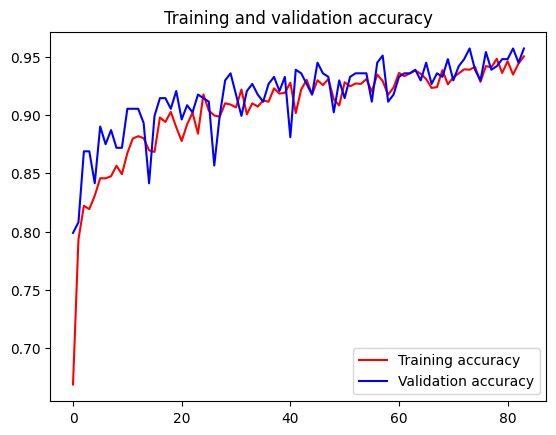

<Figure size 640x480 with 0 Axes>

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()

plt.show()

### Model Loss Rate Visualization

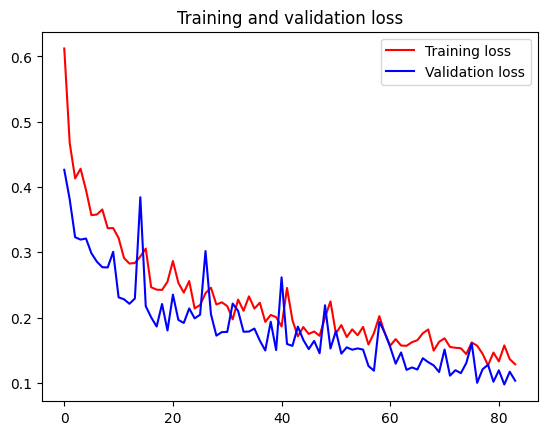

<Figure size 640x480 with 0 Axes>

In [ ]:
epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend(loc=0)
plt.figure()

plt.show()

### Model Accuracy

In [ ]:
valid_loss, valid_accuracy = model.evaluate(validation_generator)
print("Akurasi model: {}".format(valid_accuracy))

11/11 [==============================] - 4s 380ms/step - loss: 0.1032 - accuracy: 0.9573
Akurasi model: 0.957317054271698


In [ ]:
class_order = train_generator.class_indices
print("Urutan kelas:", class_order)

Urutan kelas: {'Healthy': 0, 'Parkinson': 1}


### Export Model

In [ ]:
model.save("parkinston.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
from tensorflow.keras.models import load_model

# Simpan model secara lokal
model.save("/content/drive/My Drive/parkinson_modelnormal957.h5")


In [ ]:
model = load_model('/content/drive/My Drive/parkinson_modelnormal957.h5')